# Pandas

Partially from https://pandas.pydata.org/docs/user_guide/10min.html
 
Official site: https://pandas.pydata.org/

Documentation at https://pandas.pydata.org/docs/


## Imports

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## Object Creation<br>
Creating a Series by passing a list of values, letting pandas create a default integer index

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns.

In [ ]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.914406,0.121417,-1.066553,2.018884
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-04,0.014188,0.333015,-1.742847,-0.285276
2013-01-05,0.432983,-0.054651,-0.196122,1.199866
2013-01-06,-0.598831,-0.151269,-0.096163,1.982736


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [ ]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2
#keys->columns

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [ ]:
df.head(4) #view first 4 entries

,A,B,C,D
2013-01-01,0.914406,0.121417,-1.066553,2.018884
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-04,0.014188,0.333015,-1.742847,-0.285276


In [ ]:
 df.tail(3)

,A,B,C,D
2013-01-04,0.014188,0.333015,-1.742847,-0.285276
2013-01-05,0.432983,-0.054651,-0.196122,1.199866
2013-01-06,-0.598831,-0.151269,-0.096163,1.982736


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
 df.columns 

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.to_numpy() #converts dataframe to numpy array

array([[ 0.91440574,  0.12141718, -1.0665528 ,  2.01888395],
       [-1.29698205,  1.16040972,  0.01472377,  1.84990461],
       [ 0.72094796, -0.59823365, -2.43582148,  0.49475611],
       [ 0.01418776,  0.33301537, -1.74284744, -0.28527567],
       [ 0.43298343, -0.05465101, -0.19612168,  1.19986592],
       [-0.59883059, -0.15126891, -0.09616254,  1.98273607]])

In [ ]:
df.describe() #computes some statistics for each column

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.031119,0.135115,-0.920464,1.210145
std,0.845994,0.591001,1.007242,0.938980
min,-1.296982,-0.598234,-2.435821,-0.285276
25%,-0.445576,-0.127114,-1.573774,0.671034
50%,0.223586,0.033383,-0.631337,1.524885
75%,0.648957,0.280116,-0.121152,1.949528
max,0.914406,1.160410,0.014724,2.018884


In [ ]:
df.T #transpose

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.827231,-0.012975,0.678272,-0.768095,0.041211,1.832207
B,1.315491,0.517257,1.581599,-1.028409,1.015698,-0.424307
C,-0.121781,0.367729,0.137898,0.307173,-0.602412,1.106552
D,-0.770487,0.359634,-1.697191,-0.256419,-0.334959,-0.176741


In [ ]:
 df.sort_index(axis=1, ascending=False) #if index=0 sort by index, else if index=1 sort by column names

,D,C,B,A
2013-01-01,2.018884,-1.066553,0.121417,0.914406
2013-01-02,1.849905,0.014724,1.160410,-1.296982
2013-01-03,0.494756,-2.435821,-0.598234,0.720948
2013-01-04,-0.285276,-1.742847,0.333015,0.014188
2013-01-05,1.199866,-0.196122,-0.054651,0.432983
2013-01-06,1.982736,-0.096163,-0.151269,-0.598831


In [ ]:
df.sort_values(by='B') #sort by column values

,A,B,C,D
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-06,-0.598831,-0.151269,-0.096163,1.982736
2013-01-05,0.432983,-0.054651,-0.196122,1.199866
2013-01-01,0.914406,0.121417,-1.066553,2.018884
2013-01-04,0.014188,0.333015,-1.742847,-0.285276
2013-01-02,-1.296982,1.160410,0.014724,1.849905


## Selection

In [ ]:
df['A'] 

2013-01-01    0.914406
2013-01-02   -1.296982
2013-01-03    0.720948
2013-01-04    0.014188
2013-01-05    0.432983
2013-01-06   -0.598831
Freq: D, Name: A, dtype: float64

In [ ]:
type(df['A']) #each column of the dataframe is a Series object

pandas.core.series.Series

In [ ]:
df[0:3] # : slices the rows. Final endpoint is excluded

,A,B,C,D
2013-01-01,0.914406,0.121417,-1.066553,2.018884
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-04,0.014188,0.333015,-1.742847,-0.285276


## Selection by Label

In [ ]:
df.loc[dates[0]] #recall dates was the array used as index in the dataframe
# we're selecting the row where the index is equal to dates[0]
#selects by index

A    0.914406
B    0.121417
C   -1.066553
D    2.018884
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.338550,0.691142
2013-01-02,-0.045951,2.082922
2013-01-03,-1.165968,-1.489116
2013-01-04,-2.270588,0.625400
2013-01-05,1.415099,-0.139233
2013-01-06,-1.151508,0.085745


In [ ]:
df.loc['20130102':'20130104',['A','C']] #label slicing: both endpoints are included

,A,C
2013-01-02,-1.296982,0.014724
2013-01-03,0.720948,-2.435821
2013-01-04,0.014188,-1.742847


In [ ]:
 df.loc['20130102',['A','B']]

A   -0.045951
B    2.082922
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
df.loc[dates[0],'A'] #selects one row and one column, so it returns a scalar object

0.9144057368074258

In [ ]:
df.at[dates[0],'A'] #faster but only for scalars

0.3385499501607328

## Selection by Position

In [ ]:
 df.iloc[3] #selects the fourth row of the dataframe 

A   -0.768095
B   -1.028409
C    0.307173
D   -0.256419
Name: 2013-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5,0:2] #select by integer slices just as numpy
#can select also columns by position (endpoints are excluded)

,A,B
2013-01-04,-0.768095,-1.028409
2013-01-05,0.041211,1.015698


In [ ]:
df.iloc[[1,2,4],[0,2]] #select by lists of integers positions (selecting 2nd 3rd and 5th row, 1st and 3rd column)

,A,C
2013-01-02,-1.296982,0.014724
2013-01-03,0.720948,-2.435821
2013-01-05,0.432983,-0.196122


In [ ]:
df.iloc[1:3,:] #some rows, all columns

,A,B,C,D
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756


In [ ]:
 df.iloc[:,1:3] #some columns all rows

,B,C
2013-01-01,0.121417,-1.066553
2013-01-02,1.160410,0.014724
2013-01-03,-0.598234,-2.435821
2013-01-04,0.333015,-1.742847
2013-01-05,-0.054651,-0.196122
2013-01-06,-0.151269,-0.096163


In [ ]:
df.iloc[1,1]

0.5172569106488429

In [ ]:
df.iat[1,1] #to select scalars

0.5172569106488429

## Boolean Indexing

In [ ]:
df[((df['A'] > 0) & (df['B']<=0))] #select rows where column A is positive ad column B is negative

,A,B,C,D
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-05,0.432983,-0.054651,-0.196122,1.199866


In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.315491,NaN,NaN
2013-01-02,NaN,0.517257,0.367729,0.359634
2013-01-03,0.678272,1.581599,0.137898,NaN
2013-01-04,NaN,NaN,0.307173,NaN
2013-01-05,0.041211,1.015698,NaN,NaN
2013-01-06,1.832207,NaN,1.106552,NaN


## Setting

In [ ]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.827231,1.315491,-0.121781,-0.770487,one
2013-01-02,-0.012975,0.517257,0.367729,0.359634,one
2013-01-03,0.678272,1.581599,0.137898,-1.697191,two
2013-01-04,-0.768095,-1.028409,0.307173,-0.256419,three
2013-01-05,0.041211,1.015698,-0.602412,-0.334959,four
2013-01-06,1.832207,-0.424307,1.106552,-0.176741,three


In [ ]:
df.at[dates[0], "A"] = 0 #setting values by label

In [ ]:
df.iat[0, 1] = 0 #setting value by position

In [ ]:
df #result of modifications

,A,B,C,D
2013-01-01,0.914406,0.000000,-1.066553,2.018884
2013-01-02,-1.296982,1.160410,0.014724,1.849905
2013-01-03,0.720948,-0.598234,-2.435821,0.494756
2013-01-04,0.014188,0.333015,-1.742847,-0.285276
2013-01-05,0.432983,-0.054651,-0.196122,1.199866
2013-01-06,-0.598831,-0.151269,-0.096163,1.982736


In [ ]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.678272,1.581599,0.137898,-1.697191,two
2013-01-05,0.041211,1.015698,-0.602412,-0.334959,four


## Missing Data

In [ ]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,-0.827231,1.315491,-0.121781,-0.770487,1.0
2013-01-02,-0.012975,0.517257,0.367729,0.359634,1.0
2013-01-03,0.678272,1.581599,0.137898,-1.697191,NaN
2013-01-04,-0.768095,-1.028409,0.307173,-0.256419,NaN


In [ ]:
df1.dropna(how='any')
#deletes the row if there's at least one NaN

,A,B,C,D,E
2013-01-01,-0.827231,1.315491,-0.121781,-0.770487,1.0
2013-01-02,-0.012975,0.517257,0.367729,0.359634,1.0


In [ ]:
df1.fillna(value=5)
#NaN---->5

,A,B,C,D,E
2013-01-01,-0.827231,1.315491,-0.121781,-0.770487,1.0
2013-01-02,-0.012975,0.517257,0.367729,0.359634,1.0
2013-01-03,0.678272,1.581599,0.137898,-1.697191,5.0
2013-01-04,-0.768095,-1.028409,0.307173,-0.256419,5.0


In [ ]:
pd.isnull(df1) #returns a boolean dataframe

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Stats

In [ ]:
df.mean()
#column average 

A    0.157232
B    0.496222
C    0.199193
D   -0.479360
dtype: float64

In [ ]:
 df.mean(1)
# row average

2013-01-01   -0.101002
2013-01-02    0.307911
2013-01-03    0.175144
2013-01-04   -0.436438
2013-01-05    0.029884
2013-01-06    0.584428
Freq: D, dtype: float64

## Apply

In [ ]:
df.apply(np.cumsum) #applies transformations columnwise
#spits out cumultive sum 

,A,B,C,D
2013-01-01,-0.827231,1.315491,-0.121781,-0.770487
2013-01-02,-0.840206,1.832748,0.245948,-0.410853
2013-01-03,-0.161934,3.414347,0.383846,-2.108044
2013-01-04,-0.930029,2.385938,0.691018,-2.364462
2013-01-05,-0.888818,3.401636,0.088606,-2.699421
2013-01-06,0.943389,2.977329,1.195159,-2.876162


In [ ]:
df.apply(lambda x: x.max() - x.min())
#lambda is shorthand for single line anonimous functions 

A    2.211388
B    1.758643
C    2.450545
D    2.304160
dtype: float64

## Histogramming

In [ ]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    2
1    2
2    3
3    5
4    2
5    5
6    6
7    0
8    3
9    5
dtype: int64

In [ ]:
s.value_counts()#for each value encountered in the series it prints how many times it occurs

5    3
2    3
3    2
6    1
0    1
dtype: int64

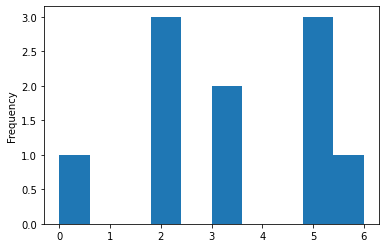

In [ ]:
s.plot.hist(s) #showing the same result graphically

## Concat

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.179177,0.605780,0.969076,-0.938428
1,1.330808,-0.122282,0.393886,1.629859
2,0.149984,1.560090,-1.572035,-0.416091
3,-1.054543,-0.278545,0.635891,1.041331
4,-0.880986,1.422072,-0.679057,0.061986
5,-2.144854,0.213624,0.655014,1.761142
6,-0.386933,0.899019,1.006027,-0.737091
7,1.764085,0.821161,-0.899220,-1.042396
8,1.745706,1.949148,-0.180283,-1.315697
9,-0.167530,0.002143,0.578162,-1.257288


In [ ]:
pieces = [df[:3], df[3:7], df[7:]] #dividing the dataframe horizontally in three pieces
pd.concat(pieces,axis=0) #stacks the dataframes one on top of the other

,0,1,2,3
0,-0.179177,0.605780,0.969076,-0.938428
1,1.330808,-0.122282,0.393886,1.629859
2,0.149984,1.560090,-1.572035,-0.416091
3,-1.054543,-0.278545,0.635891,1.041331
4,-0.880986,1.422072,-0.679057,0.061986
5,-2.144854,0.213624,0.655014,1.761142
6,-0.386933,0.899019,1.006027,-0.737091
7,1.764085,0.821161,-0.899220,-1.042396
8,1.745706,1.949148,-0.180283,-1.315697
9,-0.167530,0.002143,0.578162,-1.257288


In [ ]:
pd.concat(pieces,axis=1) #stacks the dataframes horizontally by adding new columns

,0,1,2,3,0,1,2,3,0,1,2,3
0,-0.179177,0.605780,0.969076,-0.938428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.330808,-0.122282,0.393886,1.629859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.149984,1.560090,-1.572035,-0.416091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-1.054543,-0.278545,0.635891,1.041331,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.880986,1.422072,-0.679057,0.061986,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-2.144854,0.213624,0.655014,1.761142,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.386933,0.899019,1.006027,-0.737091,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.764085,0.821161,-0.899220,-1.042396
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.745706,1.949148,-0.180283,-1.315697
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.167530,0.002143,0.578162,-1.257288


## Join

In [ ]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [ ]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [ ]:
#join using the indices: columns with same indices are put together
#rows where there are no common column values have NaNs
df.join(other, lsuffix='_caller', rsuffix='_other') 

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [ ]:
#join only works with the indices, so if we want to join along another column we need to set that column as index first
df.set_index('key').join(other.set_index('key')) #in this case we join based on the value of theccolimn 'key'

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


## Merge

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar','bar'], 'lval': [1, 2,3, 23]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3
3,bar,23


In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo','bar','pippo'], 'rval': [4, 5, 6, 7]})
right

,key,rval
0,foo,4
1,foo,5
2,bar,6
3,pippo,7


In [ ]:
pd.merge(left, right, on='key')
#only elements with the same key get combined

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5
4,bar,3,6
5,bar,23,6


## Append

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.255846,-0.026438,0.608159,0.768008
1,0.690238,0.937156,-0.169350,-0.316265
2,0.950695,2.305145,0.828268,0.737981
3,0.593061,-0.628690,0.810517,-1.926542
4,1.172135,1.299184,0.402195,0.367529
5,-0.885994,0.459251,0.058794,-0.936951
6,0.098682,-0.698513,1.706540,-0.036510
7,-2.175880,0.227054,-0.389969,-1.494573


In [ ]:
s = df.iloc[3]
s

A    0.593061
B   -0.628690
C    0.810517
D   -1.926542
Name: 3, dtype: float64

In [ ]:
df.append(s, ignore_index=True) #appending a row takes a long time because the whole dataframe gets copied to anothe memory location

,A,B,C,D
0,0.255846,-0.026438,0.608159,0.768008
1,0.690238,0.937156,-0.169350,-0.316265
2,0.950695,2.305145,0.828268,0.737981
3,0.593061,-0.628690,0.810517,-1.926542
4,1.172135,1.299184,0.402195,0.367529
5,-0.885994,0.459251,0.058794,-0.936951
6,0.098682,-0.698513,1.706540,-0.036510
7,-2.175880,0.227054,-0.389969,-1.494573
8,0.593061,-0.628690,0.810517,-1.926542


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)}
                 )
df

,A,B,C,D
0,foo,one,0.135536,-0.154526
1,bar,one,-0.754903,-0.327444
2,foo,two,-0.793231,0.059022
3,bar,three,-0.591209,1.638812
4,foo,two,1.313907,-0.054394
5,bar,two,0.241331,1.623484
6,foo,one,-0.239211,-0.392570
7,foo,three,0.592759,1.213933


In [ ]:
grouped=df.groupby('A')

grouped.groups #see the groups ('foo','bar') and the corresponding rows



{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [ ]:
for name, group in grouped: #print different groups
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.754903 -0.327444
3  bar  three -0.591209  1.638812
5  bar    two  0.241331  1.623484
foo
     A      B         C         D
0  foo    one  0.135536 -0.154526
2  foo    two -0.793231  0.059022
4  foo    two  1.313907 -0.054394
6  foo    one -0.239211 -0.392570
7  foo  three  0.592759  1.213933


In [ ]:
df_sum=grouped.sum() #apply a transformation to each group separately (sum along the column)
#notice A has become the index of the dataframe
df_sum

,C,D
A,,
bar,-1.104781,2.934852
foo,1.009761,0.671464


In [ ]:
#to reset the index we use
df_sum=df_sum.reset_index()
df_sum

,A,C,D
0,bar,-1.104781,2.934852
1,foo,1.009761,0.671464


In [ ]:
df_std=df.groupby(['A','B']).std() #can group by multiple columns
#notice how A,B behave as a hierarchical index
df_std

C         D
A   B                        
bar one         NaN       NaN
    three       NaN       NaN
    two         NaN       NaN
foo one    0.264986  0.168322
    three       NaN       NaN
    two    1.489972  0.080197

In [ ]:
df_std=df_std.reset_index()
df_std

,A,B,C,D
0,bar,one,NaN,NaN
1,bar,three,NaN,NaN
2,bar,two,NaN,NaN
3,foo,one,0.264986,0.168322
4,foo,three,NaN,NaN
5,foo,two,1.489972,0.080197


## Plotting

In [ ]:
%matplotlib inline

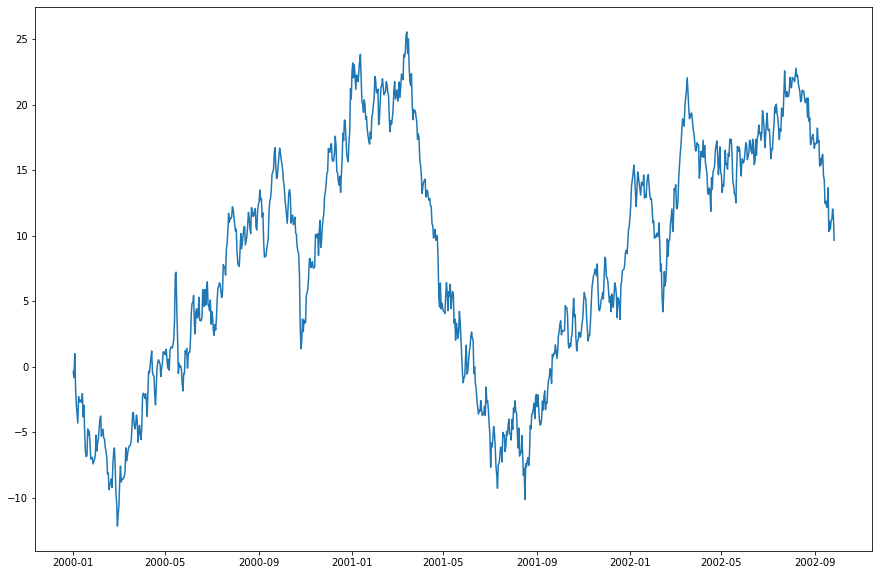

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
plt.figure(figsize=(15,10))
plt.plot(ts)

No handles with labels found to put in legend.


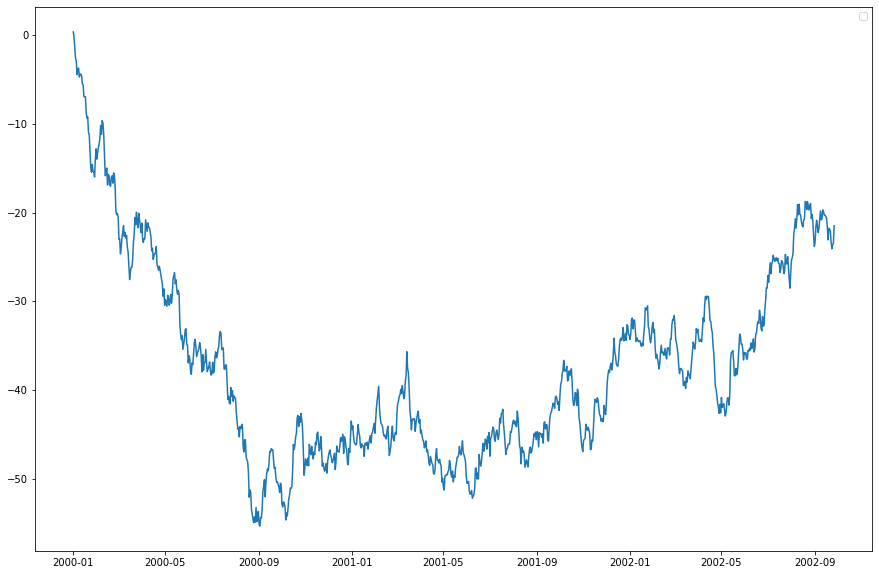

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(figsize=(15,10))
plt.plot(df.index,df['A'])
plt.legend(loc='best')


## Getting Data In/Out

In [ ]:
df.to_csv('foo.csv') #write dataframe to file in comma separated values (csv) format

In [ ]:
pd.read_csv('foo.csv') #read datafream from file

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.167665,-0.058692,0.871147,1.462657
1,2000-01-02,1.130091,0.385623,0.859349,-0.146619
2,2000-01-03,0.944996,-0.316596,1.114132,-0.804473
3,2000-01-04,1.430127,-0.032473,-0.383608,0.809568
4,2000-01-05,2.134286,0.592066,-0.180294,0.763598
...,...,...,...,...,...
995,2002-09-22,-51.602961,-8.194392,-6.957667,15.497378
996,2002-09-23,-51.196911,-8.583613,-6.887184,15.508617
997,2002-09-24,-50.990385,-8.566861,-8.707100,16.255409
998,2002-09-25,-51.388193,-8.518555,-9.784863,16.090249


In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.167665,-0.058692,0.871147,1.462657
1,2000-01-02,1.130091,0.385623,0.859349,-0.146619
2,2000-01-03,0.944996,-0.316596,1.114132,-0.804473
3,2000-01-04,1.430127,-0.032473,-0.383608,0.809568
4,2000-01-05,2.134286,0.592066,-0.180294,0.763598
...,...,...,...,...,...
995,2002-09-22,-51.602961,-8.194392,-6.957667,15.497378
996,2002-09-23,-51.196911,-8.583613,-6.887184,15.508617
997,2002-09-24,-50.990385,-8.566861,-8.707100,16.255409
998,2002-09-25,-51.388193,-8.518555,-9.784863,16.090249
